In [1]:
#importing dependencies

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
# Data Collection And Processing

In [4]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/drive/MyDrive/mlproject2/car data.csv')

In [5]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [7]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [11]:
# Encoding the categorical data

In [12]:
# encoding "Fuel_Type" column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}} ,inplace=True)

# encoding "Seller_Type" column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)

# encoding the "Trasmission" column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True )

In [13]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [14]:
#Splitting the data and target

In [16]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [17]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [18]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [19]:
#Splitting Training And Test data

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2 )

In [21]:
#model Training

In [22]:
# Linear Regression

In [23]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [24]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [25]:
#Model Evaluation

In [26]:
#prediction on traing the data
training_data_prediction = lin_reg_model.predict(X_train)

In [27]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)

In [28]:
print("R squared Error: " , error_score)

R squared Error:  0.8799451660493711


In [29]:
#Visualize the actual prices and prediction prices

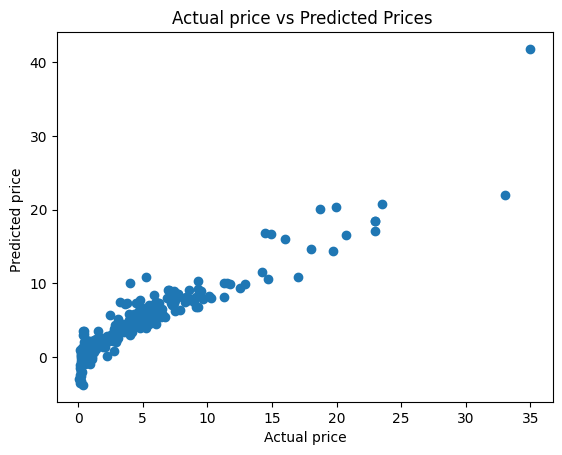

In [32]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price ")
plt.title("Actual price vs Predicted Prices ")
plt.show()

In [33]:
# prediction on training data
test_data_prediction = lin_reg_model.predict(X_test)

In [34]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error: ", error_score)

R squared Error:  0.8365766715027051


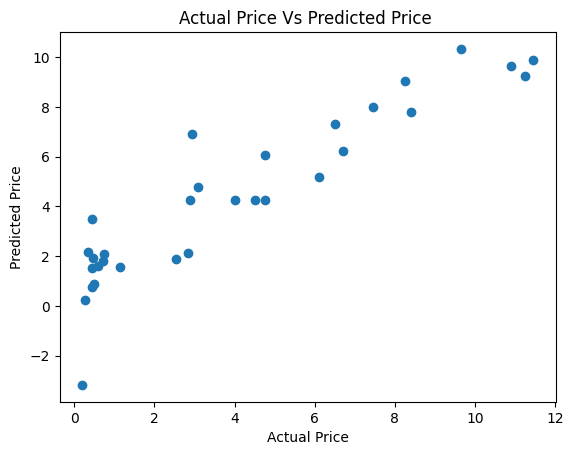

In [35]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price ")
plt.show()

In [36]:
#Lasso Regression

In [37]:
#loading the liner regression model
lass_reg_model = Lasso()

In [39]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [40]:
#Model Evaluation

In [41]:
#prediction on trainig data
training_data_prediciton = lass_reg_model.predict(X_train)

In [43]:
# R squared Error
error_score  = metrics.r2_score(Y_train , training_data_prediciton)
print("R squared Error:", error_score)

R squared Error: 0.8427856123435794


In [45]:
# visualize the actual price and predicted price


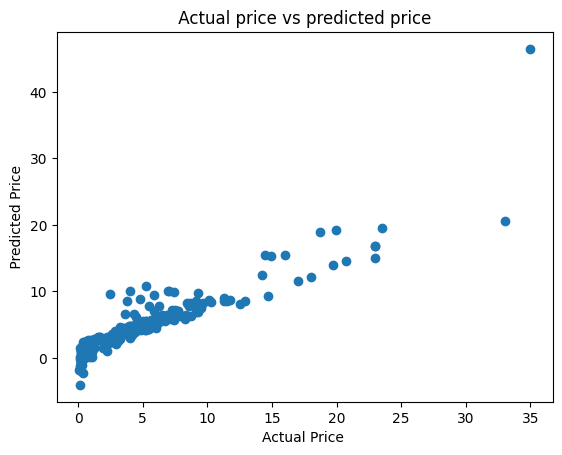

In [47]:
plt.scatter(Y_train , training_data_prediciton)
plt.xlabel("Actual Price ")
plt.ylabel(" Predicted Price ")
plt.title(" Actual price vs predicted price ")
plt.show()


In [49]:
# prediion on traing data
test_data_prediction = lass_reg_model.predict(X_test)

In [53]:
# R squared error
error_score = metrics.r2_score(Y_test , test_data_prediction)
print("R squared error" , error_score)

R squared error 0.8709167941173195


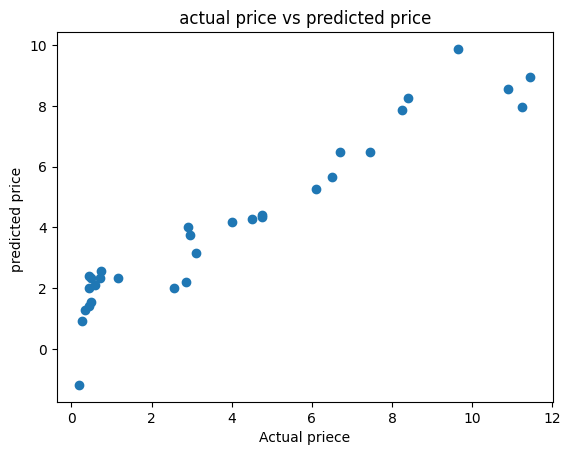

In [54]:
plt.scatter(Y_test , test_data_prediction)
plt.xlabel("Actual priece")
plt.ylabel("predicted price ")
plt.title(" actual price vs predicted price ")
plt.show()